In [56]:
import pandas as pd

# Load the wine quality dataset
wine_data_red = pd.read_csv('winequality-red.csv', delimiter = ';')
#print(wine_data_red.head())

wine_data_white = pd.read_csv('winequality-white.csv', delimiter = ';')
#print(wine_data_white.head())

with open('winequality.names', 'r') as file:
    print(file.read())


Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [57]:
#check for missing data
print("Red wine shape:", wine_data_red.shape)
print("White wine shape:", wine_data_white.shape)
print("Missing values in red wine:\n", wine_data_red.isnull().sum())
print("Missing values in white wine:\n", wine_data_white.isnull().sum())

Red wine shape: (1599, 12)
White wine shape: (4898, 12)
Missing values in red wine:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Missing values in white wine:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [58]:

wine_data_red['type'] = 'red'
wine_data_white['type'] = 'white'

# Combine datasets
wine_data = pd.concat([wine_data_red, wine_data_white], ignore_index=True)
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

In [59]:
print("Red wine shape:", wine_data_red.shape)
print("White wine shape:", wine_data_white.shape)
print("Combined dataset shape:", wine_data.shape)

# Verify total rows
total_rows = wine_data_red.shape[0] + wine_data_white.shape[0]
print("Total rows (should match combined dataset):", total_rows)

print(wine_data['type'].value_counts())


Red wine shape: (1599, 13)
White wine shape: (4898, 13)
Combined dataset shape: (6497, 13)
Total rows (should match combined dataset): 6497
type
white    4898
red      1599
Name: count, dtype: int64


In [60]:
print("\nLast rows of the combined dataset:")
print(wine_data.tail())


Last rows of the combined dataset:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol 

In [61]:
#higher quality wines ('quality' >= 7) will be labeled 1 and lower quality wines ('quality' < 7) will be labeled -1
wine_data['target'] = wine_data['quality'].apply(
    lambda x: 1 if x >= 7 else -1
)
wine_data = wine_data.drop('quality', axis=1)  # Drop the original quality column
print(wine_data['target'].value_counts())  # Check class distribution

print(wine_data.head())



target
-1    5220
 1    1277
Name: count, dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol type  target  
0    

In [63]:
# Encode 'type' into numeric values
wine_data['type_encoded'] = wine_data['type'].apply(lambda x: 0 if x == 'red' else 1)

# Use the encoded column in features
X = wine_data.drop(['target', 'type'], axis=1)  # Use 'type_encoded' instead of 'type'


In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Red = 0, White = 1

In [68]:
from sklearn.model_selection import train_test_split

# 20/80 Partition
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# 50/50 Partition
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# 80/20 Partition
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

In [70]:
from sklearn.metrics import accuracy_score

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (Random Forest):", accuracy)

Test Accuracy (Random Forest): 1.0


In [72]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-Validation Accuracy (Random Forest):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy (Random Forest): [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


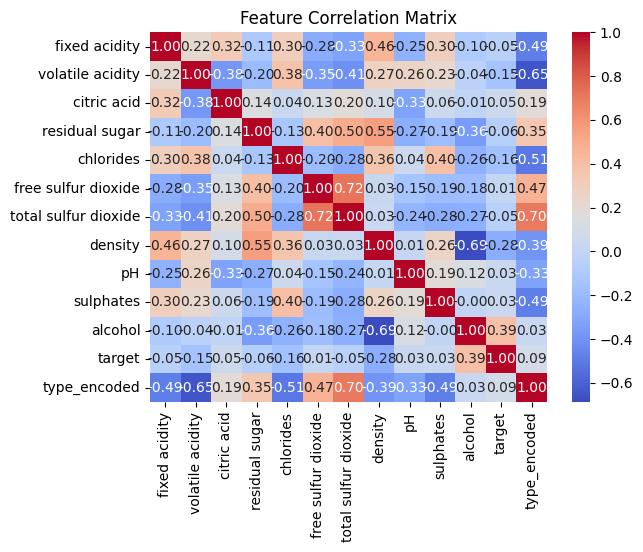

In [74]:
numeric_data = wine_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_data.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()